<a href="https://colab.research.google.com/github/rm22-dot/NLP-lab-2025/blob/main/NLP%20Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [2]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("surrey-nlp/PLOD-CW-25")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/268 [00:00<?, ?B/s]

PLOD-CW-25-Train.parquet:   0%|          | 0.00/343k [00:00<?, ?B/s]

PLOD-CW-25-Test.parquet:   0%|          | 0.00/55.5k [00:00<?, ?B/s]

PLOD-CW-25-Val.parquet:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/250 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/150 [00:00<?, ? examples/s]

In [3]:
# Check what splits are available
print(dataset)

# Print a sample from the training data
print(dataset['train'][0])


DatasetDict({
    train: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 250
    })
    validation: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 150
    })
})
{'tokens': ['MRR', ',', 'mortality', 'rate', 'ratio', ';', 'TBI', ',', 'traumatic', 'brain', 'injury', '.'], 'pos_tags': ['NOUN', 'PUNCT', 'NOUN', 'NOUN', 'NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'ADJ', 'NOUN', 'NOUN', 'PUNCT'], 'ner_tags': ['B-AC', 'O', 'B-LF', 'I-LF', 'I-LF', 'O', 'B-AC', 'O', 'B-LF', 'I-LF', 'I-LF', 'O']}


B-AC: 6626
O: 62474
B-LF: 3923
I-LF: 9525


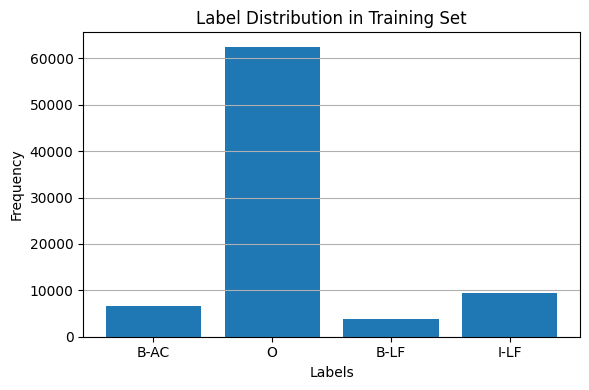

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten all labels from training set (they are already strings)
all_labels_named = [label for sentence in dataset['train']['ner_tags'] for label in sentence]

# Count how often each label appears
label_counts = Counter(all_labels_named)

# Print counts (use this in your report)
for label, count in label_counts.items():
    print(f"{label}: {count}")

# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(label_counts.keys(), label_counts.values())
plt.title("Label Distribution in Training Set")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


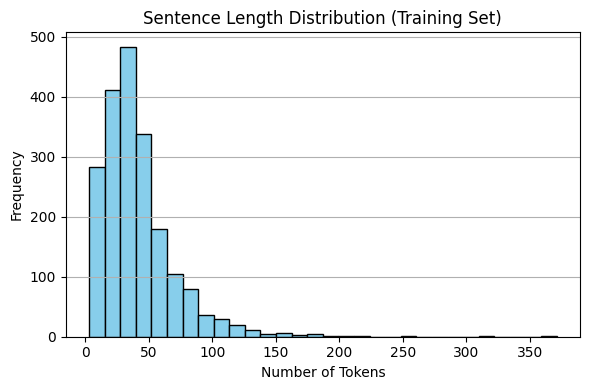

In [15]:
import matplotlib.pyplot as plt

sentence_lengths = [len(tokens) for tokens in dataset['train']['tokens']]

plt.figure(figsize=(6, 4))
plt.hist(sentence_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("Sentence Length Distribution (Training Set)")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



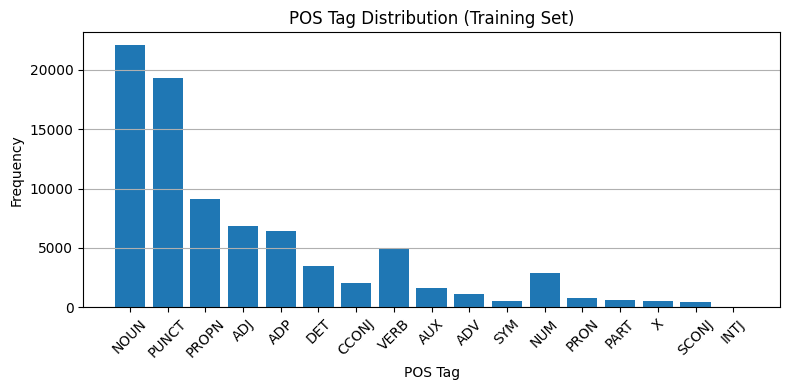

In [16]:
from collections import Counter

all_pos = [pos for sentence in dataset['train']['pos_tags'] for pos in sentence]
pos_counts = Counter(all_pos)

plt.figure(figsize=(8, 4))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Distribution (Training Set)")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [17]:
from collections import Counter

abbrev_long_pairs = []

for example in dataset['train']:
    tokens = example['tokens']
    tags = example['ner_tags']

    current_abbrev = None
    current_long = []

    for i, tag in enumerate(tags):
        if tag == 'B-AC':
            current_abbrev = tokens[i]
        elif tag == 'B-LF':
            current_long = [tokens[i]]
        elif tag == 'I-LF' and current_long:
            current_long.append(tokens[i])
        else:
            # End of an entity — check if we collected both
            if current_abbrev and current_long:
                long_form = ' '.join(current_long)
                abbrev_long_pairs.append((current_abbrev, long_form))
                current_abbrev = None
                current_long = []

# Count most common pairs
pair_counts = Counter(abbrev_long_pairs).most_common(10)

# Print top 10
for pair, count in pair_counts:
    print(f"{pair[0]} → {pair[1]}: {count}")


CI → confidence interval: 26
BMI → body mass index: 23
WT → wild - type: 22
GFP → green fluorescent protein: 19
HR → hazard ratio: 18
OR → odds ratio: 16
SD → standard deviation: 12
KO → knockout: 11
TB → tuberculosis: 10
WHO → World Health Organization: 10


### 📊 Top 10 Abbreviation–Long Form Pairs

The chart below shows the most frequently occurring abbreviation–long form pairs in the dataset.

These are useful for understanding common biomedical concepts and helping our models learn abbreviation expansion effectively.


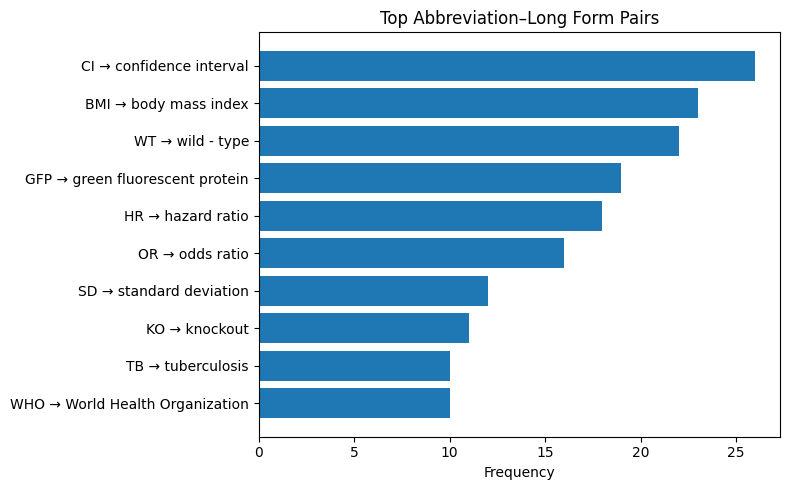

In [20]:
import matplotlib.pyplot as plt

pairs, counts = zip(*pair_counts)
labels = [f"{a} → {l}" for a, l in pairs]

plt.figure(figsize=(8, 5))
plt.barh(labels, counts)
plt.title("Top Abbreviation–Long Form Pairs")
plt.xlabel("Frequency")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


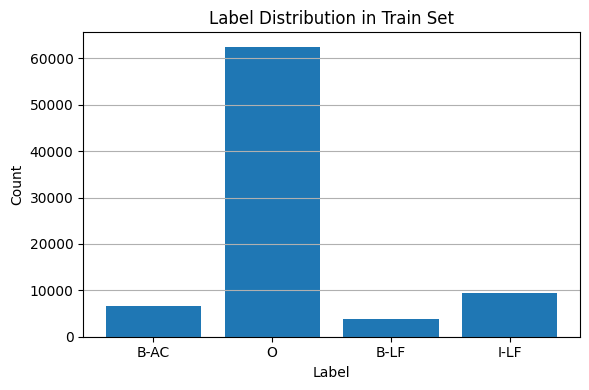

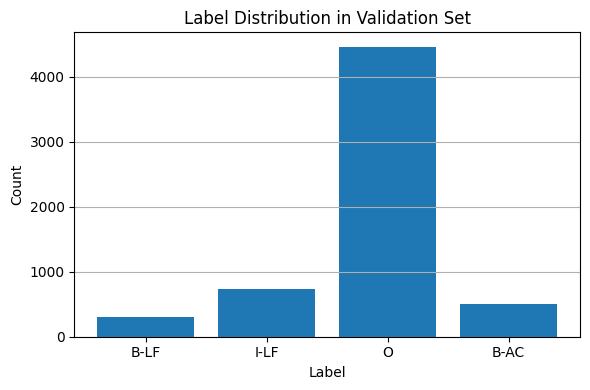

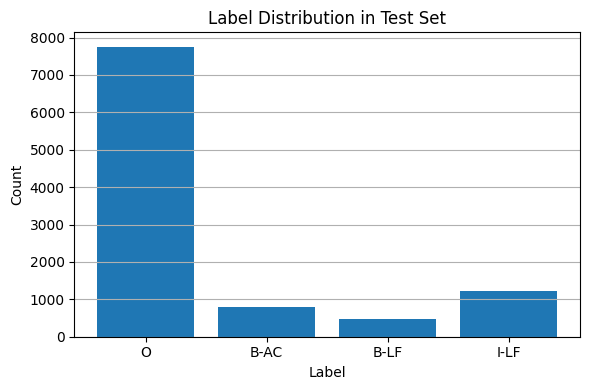

In [22]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_label_distribution(split_name):
    label_counter = Counter()

    for sentence in dataset[split_name]['ner_tags']:
        label_counter.update(sentence)

    if not label_counter:
        print(f"No labels found in {split_name} split.")
        return

    labels = list(label_counter.keys())
    counts = [label_counter[label] for label in labels]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, counts)
    plt.title(f"Label Distribution in {split_name.capitalize()} Set")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Plot for each split
plot_label_distribution("train")
plot_label_distribution("validation")
plot_label_distribution("test")

